In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

***********************************************Importing the packages **************************************************


In [0]:
from pyspark.sql.types import StructField, ShortType, StructType, StringType, IntegerType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import when, col, sum, avg, row_number
from pyspark.sql.window import Window

************************************** Creating spark session *************************************************

In [0]:
from pyspark.sql import SparkSession
#create session

spark = SparkSession.builder.appName("ILP Data Analysis").getOrCreate()

To get the data from the AWS s3 bucket we are using a spark session named spark


*************************************************** EXTRACTION ******************************************

In [0]:
ball_by_ball_df = spark.read.format("csv").option("header", "true").option("inferschema", "true").load("s3://s3-my-de-project1/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

The below command is getting the data in string format from s3 bucket
1) ball_by_ball_df = spark.read.format("csv").option("header", "true").load("s3://s3-my-de-project1/Ball_By_Ball.csv")

To get the integer data we can use the below option --- option("inferschema", "true")

2) ball_by_ball_df = spark.read.format("csv").option("header", "true").option("inferschema", "true").load("s3://s3-my-de-project1/Ball_By_Ball.csv")

Using 2nd command we are getting data in integer format , but boolen data is also converted to integer. To avoide this we have to use schema
We have already imported the schema packages in above i.e.,
from pyspark.sql.types import StructField, ShortType, StructType, StringType, IntegerType, BooleanType, DateType, DecimalType

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

We can take use ChatGPT to wrote all our schema's by providing column and datatypes names, to save the time , Sample: (This is my dataframe schema , i want you to generate pyspark struct schema using my dataframe schema)

After generating the schema , we have used the schema name in the dataframe, Now it will show the correct columns data types


In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("s3://s3-my-de-project1/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # "year" can be mapped to IntegerType for compatibility.
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header", "true").load("s3://s3-my-de-project1/Match.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Decimal with precision 10, scale 2 (adjustable as needed).
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # "year" can be mapped to IntegerType.
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header", "true").load("s3://s3-my-de-project1/Player_match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
player_df = spark.read.schema(player_schema).format("csv").option("header", "true").load("s3://s3-my-de-project1/Player.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])
team_df = spark.read.schema(team_schema).format('csv').option('header', 'true').load('s3://s3-my-de-project1/Team.csv')

*************************************************** TRANSFORM **************************************************

In [0]:
from pyspark.sql.functions import when, col, sum, avg, row_number

#Filter by includes only valid deliveries(Excluding extras like wides and no balls for specific anaylsis)
ball_by_ball_df = ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))

#Aggeregation: Calculate the total and average runs scored in each match and innings 
taotal_avg_runs = ball_by_ball_df.groupBy("Match_id", "innings_no").agg(
    sum("runs_scored").alias("Total_runs"),
    avg("runs_scored").alias("Average_Runs")
)

In [0]:
from pyspark.sql.window import Window

#windows function: Calculate runnings total of runs in each match for each over
WindowsSpec_df = Window.partitionBy("match_id", "innings_no").orderBy("Over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "Running_total_runs",
    sum("runs_scored").over(WindowsSpec_df)
)

In [0]:
#Flag the high impact balls (either it is a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "Hign_Impact",
    when( (col("runs_scored")+ col("extra_runs") >6 ) | (col("bowler_wicket")== True) , True ).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

#Extracting year, month and day from the match date for more detailed time based analysis
match_df = match_df.withColumn("Year", year("match_date"))
match_df = match_df.withColumn("Month", month("match_date"))
match_df = match_df.withColumn("Day", dayofmonth("match_date"))

#High margin win: categorizing win margins into "High", "Medium" and "Low"
match_df = match_df.withColumn(
    "win_margin_cateogory",
    when(col("win_margin")>=100, "High")
    .when((col("win_margin")>=50) & (col("win_margin") <100), "Medium")
    .otherwise("low")
)

#Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

#Show the enchanced match dataFrame
match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+--------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|Year|Month| Day|win_margin_cateogory|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+--------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|     

In [0]:
from pyspark.sql.functions import lower, regexp_replace

#Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]","")))

#Handling missing values in 'batting_hand' and 'bowling_skill' with a default 'unkown'

player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown" })
                               
#categorizing players based on batting style
player_df = player_df.withColumn(
    "batting_style",
    when(  col("batting_hand").contains("left"),"Left-handed").otherwise("Right-handed")
)

#show the modified player datframe
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India| Right-handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date,expr

#add a 'veteran_status' column based on player age

player_match_df =player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match")>=35, "Veteran").otherwise("Non-Veteran")
    )

#Dynamic column to calculate years since Debut
player_match_df = player_match_df.withColumn(
    "Years_since_Debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|Years_since_Debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("Match")
player_df.createOrReplaceTempView("Player")
player_match_df.createOrReplaceTempView("Player_match")
team_df.createOrReplaceTempView("Team")

In [0]:
top_scoring_batsman_per_season= spark.sql(""" 
   select 
   p.player_name, 
   m.season_year,
   sum(b.runs_scored) as total_runs
   from ball_by_ball b
   Join Match m on b.match_id = m.match_id
   Join player_match pm on m.match_id = pm.match_id AND b.striker = pm.player_id
   join player p on p.player_id = pm.player_id  
   Group by p.player_name, m.season_year
   order by m.season_year, total_runs desc                               
   """)

In [0]:
top_scoring_batsman_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       se marsh|       2008|       614|
|      g gambhir|       2008|       532|
|  st jayasuriya|       2008|       508|
|      sr watson|       2008|       463|
|       gc smith|       2008|       437|
|   ac gilchrist|       2008|       431|
|      yk pathan|       2008|       430|
|       sk raina|       2008|       420|
|       ms dhoni|       2008|       414|
|       v sehwag|       2008|       399|
|      rg sharma|       2008|       399|
|       r dravid|       2008|       370|
|     sc ganguly|       2008|       349|
|       s dhawan|       2008|       340|
|  kc sangakkara|       2008|       319|
|      dj hussey|       2008|       318|
|     rv uthappa|       2008|       316|
|    sa asnodkar|       2008|       311|
|   yuvraj singh|       2008|       299|
|       pa patel|       2008|       297|
|y venugopal rao|       2008|       283|
|      ja morkel

In [0]:
economical_bowlers_powerplay = spark.sql("""
 select
 p.player_name,
 AVG(b.runs_scored) as avg_runs_per_ball,
 count(b.bowler_wicket) as total_wickets
 from ball_by_ball b 
 Join player_match pm on b.match_id = pm.match_id and b.bowler = pm.player_id
 join player p on pm.player_id = p.player_id
 where b.over_id <=6
 group by p.player_name
 having count(*)>120
 order by avg_runs_per_ball, total_wickets desc                                        
 """)

economical_bowlers_powerplay.show(5) 

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|smsm senanayake|0.8492063492063492|            0|
|      sp narine| 0.929718875502008|            0|
|     gd mcgrath|0.9324324324324325|            0|
|     sl malinga|0.9407630522088354|            0|
|  sohail tanvir| 0.946969696969697|            0|
+---------------+------------------+-------------+
only showing top 5 rows



In [0]:
toss_impact_individual_matches = spark.sql("""
select m.match_id,
m.toss_winner,
m.toss_name,
m.match_winner,
CASE 
When m.toss_winner = m.match_winner 
Then 'won' 
else 'lost'
end as match_outcome
from match m
where m.toss_name is not null
order by m.match_id                                                                            
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         lost|

In [0]:
Average_runs_in_wins = spark.sql(""" 
select p.player_name,
AVG(b.runs_scored) as avg_runs_in_wins,
count(*) as innings_palyed
from ball_by_ball b 
join player_match pm on b.match_id = pm.match_id and b.striker = pm.player_id
join player p on pm.player_id = p.player_id
join match m on pm.match_id = m.match_id
where m.match_winner = pm.player_team
group by p.player_name
order by avg_runs_in_wins desc
""")
Average_runs_in_wins.show()

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_palyed|
+--------------+------------------+--------------+
|   rashid khan|               6.0|             1|
| shahid afridi|3.3333333333333335|             6|
|      ba bhatt|               3.0|             2|
|      an ahmed|               3.0|             3|
|       sn khan|2.5789473684210527|            19|
|    sp jackson|               2.4|             5|
| harmeet singh|2.3333333333333335|             6|
|      umar gul|2.3076923076923075|            13|
|    sm pollock|               2.2|            15|
|       ms gony|2.1379310344827585|            29|
|mj mcclenaghan|               2.0|            11|
|       pr shah|               2.0|             4|
|   ds kulkarni|               2.0|             3|
| shivam sharma|               2.0|             2|
|     vrv singh|               2.0|             2|
|      rs sodhi|               2.0|             2|
| cr brathwaite|1.9642857142857

******************************************** Visualization  ***************************************************

In [0]:
import matplotlib.pyplot as plt

Matplotlib is a Python package that allows users to create and visualize data in a variety of ways. It's a popular tool that can be used in many different contexts, including Python scripts, Jupyter notebooks, and web application servers. 

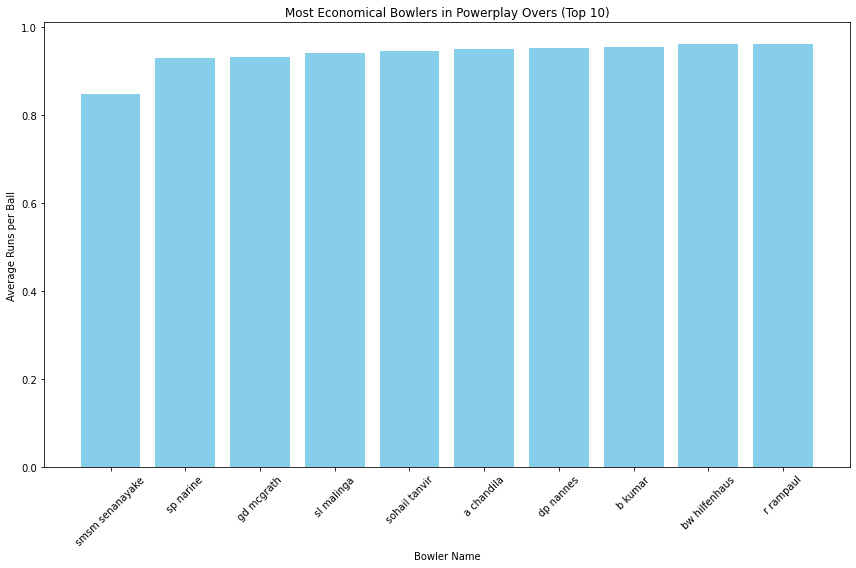

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))

# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')

plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

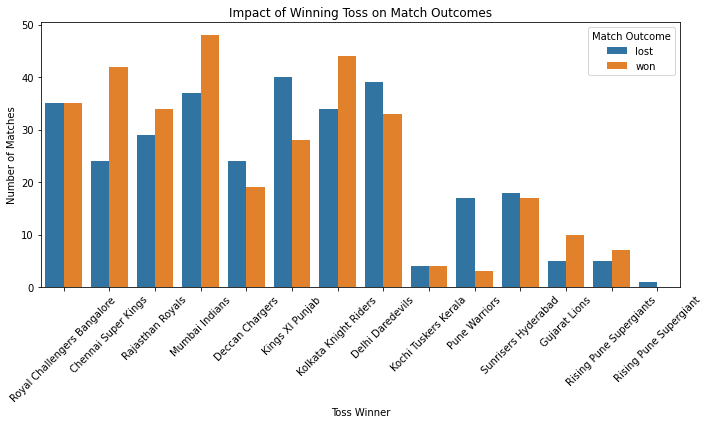

In [0]:
import seaborn as sns

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

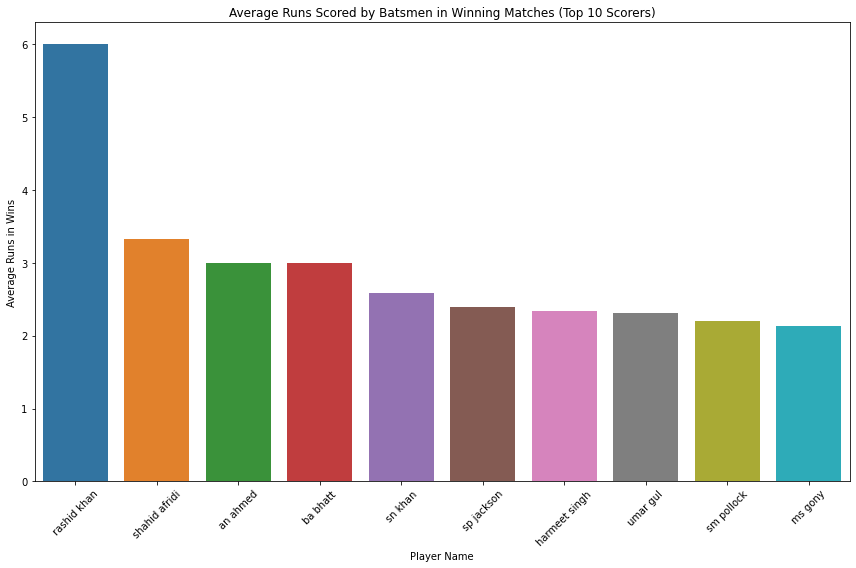

In [0]:
average_runs_pd = Average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [0]:
scores_by_venue = spark.sql(""" 
 select venue_name,
 Avg(total_runs) as average_score,
 max(total_runs) as highest_score
 from (
     select 
     ball_by_ball.match_id,
     match.venue_name,
     sum(runs_scored) as total_runs
     from ball_by_ball
     join match on ball_by_ball.match_id = match.match_id 
     Group by ball_by_ball.match_id, match.venue_name
  )  
  group by venue_name
  order by average_score desc                         
""")

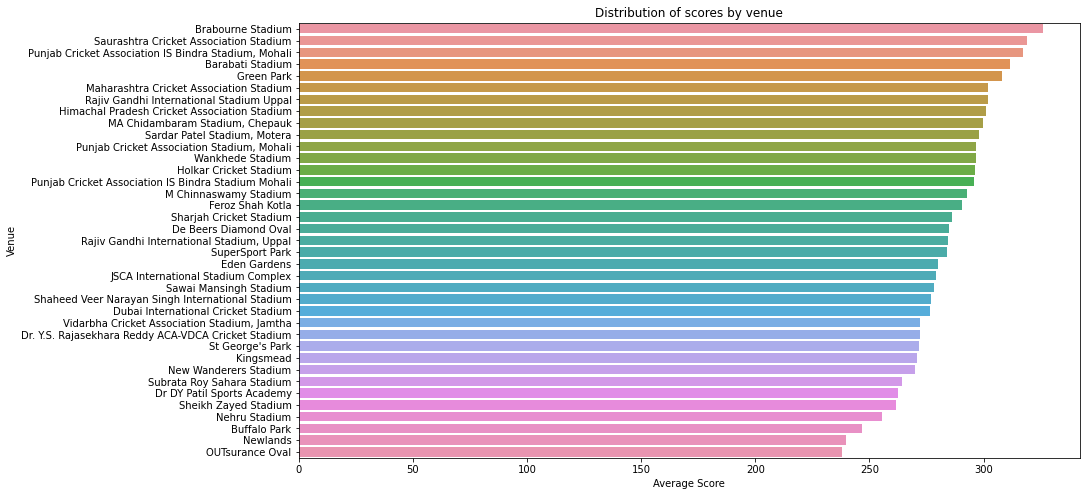

In [0]:
#Convert to pandas dataframe
scores_by_venue_pd = scores_by_venue.toPandas()

#plot
plt.figure(figsize=(14,8))
sns.barplot(x='average_score', y ='venue_name', data = scores_by_venue_pd)
plt.title('Distribution of scores by venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
#EXECUTE SQL QUERY
dismissal_types = spark.sql(""" 
select out_type,
count(*) as frequency
from ball_by_ball
where out_type is not null
group by out_type
order by frequency desc                            
""")

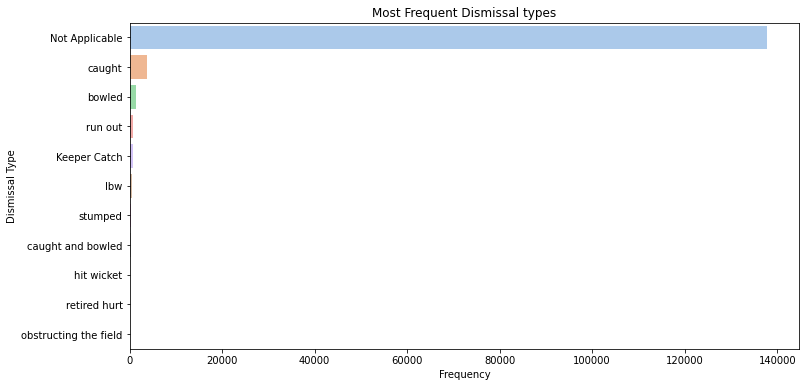

In [0]:
#convert tpo pandas DataFrame

dismissal_types_pd = dismissal_types.toPandas()

#plot
plt.figure(figsize = (12,6))
sns.barplot(x='frequency', y = 'out_type', data= dismissal_types_pd, palette = 'pastel')
plt.title('Most Frequent Dismissal types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
team_toss_win_performance = spark.sql(""" 
 select team1, 
 count(*) as matches_played,
 sum(case when toss_winner = match_winner then 1 else 0 end ) as wins_after_toss
 from match
 where toss_winner = team1
 group by team1
 order by wins_after_toss desc                                   
""")

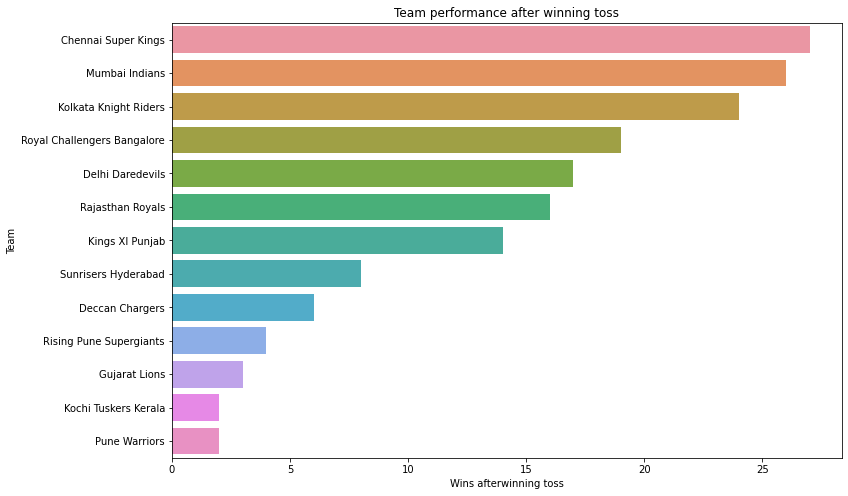

In [0]:
#convert to pandas dataframe
team_toss_win_pd = team_toss_win_performance.toPandas()

#plot
plt.figure(figsize=(12,8))
sns.barplot(x='wins_after_toss', y = 'team1', data = team_toss_win_pd)
plt.title('Team performance after winning toss')
plt.xlabel('Wins afterwinning toss')
plt.ylabel('Team')
plt.show()